# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def ten_times_dice():
    global lista
    lista=[]
    for i in range (10):
        a=random.choice([1,2,3,4,5,6])
        lista.append(a)   
    return (lista)

In [7]:
ten_times_dice()
data_arr=np.array(lista)

In [95]:
data_df=pd.DataFrame(data_arr,columns=["Result"]).reset_index()
data_df_renamed= data_df.rename(columns={'index':'roll'})
data_df_renamed["Roll"] = data_df_renamed["roll"] + 1
data_df_renamed_final = data_df_renamed[["Roll", "Result"]]
data_sorted=data_df_renamed_final.sort_values('Result', ascending=False).reset_index()
data_sorted_final = data_df_renamed[["Roll", "Result"]].sort_values("Result", ascending=True)

#### 2.- Plot the results sorted by value.

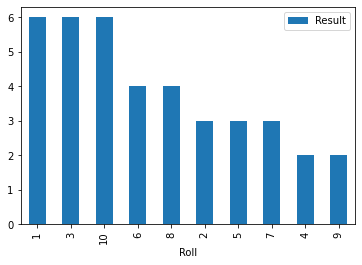

In [25]:
# your code here
data_sorted.plot.bar(x="Roll", y="Result");

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

,Roll,Result
0,6,3
1,3,3
2,4,2
3,2,2


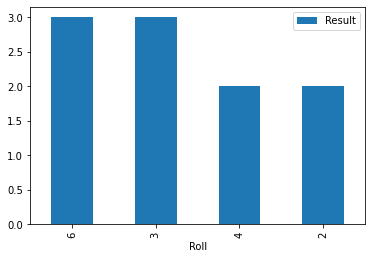

In [21]:
# your code here
a=data_df_renamed_final['Result'].value_counts().reset_index()
a_renamed= a.rename(columns={'index':'Roll'})

a_renamed.plot.bar(y="Result",x="Roll")
display(a_renamed)


In [ ]:
"""
your comments here
The 'results' sorted by value shows every result (Roll) in a descending order.
The 'frequency distribution' plots shows the aggregated number of events for each result, ordered by result (Roll)

(The number columns for each result value in the 'results' plot is equal to the value on the x axis for each result value in the 'frequency distrubution' )
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [28]:
#extracting values with loc
a=data_sorted_final.loc[0,"Result"]

In [30]:
#obtaining number of rows with df.index
num_rows=(len(data_sorted_final.index))

In [31]:
#obtaining the sum value of every row
sum_value=0
for i in range(num_rows):
    value=data_sorted_final.loc[i,"Result"]
    sum_value=sum_value+value

In [32]:
#obtaining the average value
avg_val=sum_value/num_rows
print(avg_val)

3.9


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [33]:
# your code here
def mean_calculation(df,column):
    num_rows=(len(df.index))
    sum_value=0
    for i in range(num_rows):
        value=df.iloc[i,column]
        sum_value=sum_value+value
    return sum_value/num_rows  

In [34]:
mean_calculation(data_sorted_final,1)

3.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [92]:
# your code here
def median_calculation(df,column):
    num_rows=(len(df.index))
    global rows
    rows=int(math.modf(num_rows/2)[1])
    if num_rows%2==0:
        median1=df.iloc[rows-1,column]
        median2=df.iloc[(rows),column]
        median=(median1+median2)/2
    else:
        median=df.iloc[rows,column]
    return median

In [38]:
#before appliying the function, I must make sure that I align the index with the ordered by value df
data_sorted_final.reset_index(drop=True, inplace=True)

In [93]:
#I chose the result column to apply the function (1)
median_calculation(data_sorted_final,1)

3.5

In [94]:
#I check the results with the data
display(data_sorted_final)
print(data_sorted_final.iloc[rows-1,1])
print(data_sorted_final.iloc[(rows),1])

,Roll,Result
0,1,6
1,3,6
2,10,6
3,6,4
4,8,4
5,2,3
6,5,3
7,7,3
8,4,2
9,9,2


4
3


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [101]:
# your code here
def quartile_calculation(df,column):
    num_rows=(len(df.index))
    high=df.max()[column]
    low=df.min()[column]
    global rows
    rows=int(math.modf(num_rows/2)[1])
    if num_rows%2==0:
        median1=df.iloc[rows-1,column]
        median2=df.iloc[(rows),column]
        median=(median1+median2)/2
        fq_df=df.loc[:rows-1,:]
        quartile1=median_calculation(fq_df,column)
        tq_df=df.loc[rows:,:]
        quartile3=median_calculation(tq_df,column)     
    else:
        median=df.iloc[rows,column]
        fq_df=df.loc[:rows-1,:]
        quartile1=median_calculation(fq_df,column)
        tq_df=df.loc[rows+2:,:]
        quartile3=median_calculation(tq_df,column) 
        
    #return (quartile1,median,quartile3)
    return(f'first quartile: [{low} , {quartile1})      second quartile: [{quartile1} , {median})      third quartile: [{median} , {quartile3})      fourth quartile: [{quartile3} , {high}]')
   

In [102]:
quartile_calculation(data_sorted_final,1)

'first quartile: [2 , 2.5)      second quartile: [2.5 , 3.5)      third quartile: [3.5 , 6.0)      fourth quartile: [6.0 , 6]'

In [99]:
quartile_calculation(data_sorted_final,1)

'first quartile: [2 , 2.5)      second quartile: [2.5 , 3.5)      third quartile: [3.5 , 6.0)      fourth quartile: [6.0 , 6]'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [104]:
# your code here
data=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/roll_the_dice_hundred.csv')

In [105]:
display(data)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  100 non-null    int64
 1   roll        100 non-null    int64
 2   value       100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [115]:
data_renamed=data[["roll", "value"]].sort_values('value', ascending=False)
#sort_values("Result")

In [116]:
data_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 99 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   roll    100 non-null    int64
 1   value   100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


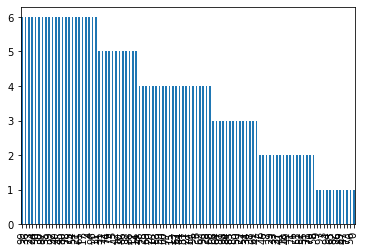

In [117]:
data_renamed['value'].plot.bar();

In [ ]:
"""
your comments here
I see a kind of a stair in which each step of the stair is as big as the frequency of the value. Since I decided to order the values descending, it is a descending stair.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [ ]:
# your code here
def mean_calculation(df,column):
    num_rows=(len(df.index))
    sum_value=0
    for i in range(num_rows):
        value=df.iloc[i,column]
        sum_value=sum_value+value
    return sum_value/num_rows  

In [118]:
mean_calculation(data_renamed,1)

3.74

#### 3.- Now, calculate the frequency distribution.


In [124]:
# your code here
fd=data_renamed["value"].value_counts().reset_index() 
fd_renamed= fd.rename(columns={'index':'roll'})
display(fd_renamed)


,roll,value
0,6,23
1,4,22
2,2,17
3,3,14
4,5,12
5,1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:ylabel='Frequency'>

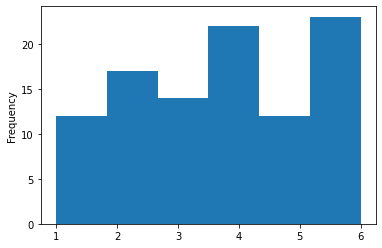

In [137]:
data_renamed["value"].plot.hist(bins=6)

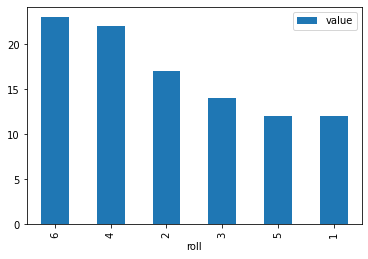

In [136]:
fd_renamed.plot.bar(x="roll", y="value");

In [ ]:
fd_renamed.plot.hist(x="roll", y="value");

In [ ]:
"""
your comments here
Since values are closed (1 to 6) and the histogram shows the frequency for every value, we could
try to guess the mean by thinking of a point that lets more or less the same volume on both sides (the median)
and wheigting a bit with to the side where the higher values are. But this method is less valid when there
are outliers because the weight of value is higher and intuition could produce a misscalculation.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [158]:
# your code here
data=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/roll_the_dice_thousand.csv')

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1000 non-null   int64
 1   roll        1000 non-null   int64
 2   value       1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [160]:
data_renamed=data[["roll", "value"]].sort_values('value', ascending=False)

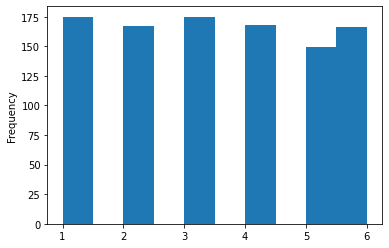

In [161]:
data_renamed['value'].plot.hist();

In [ ]:
data_renamed=data[["roll", "value"]].sort_values('value')
#sort_values("Result")

In [146]:
# your code here
def mean_calculation(df,column):
    num_rows=(len(df.index))
    sum_value=0
    for i in range(num_rows):
        value=df.iloc[i,column]
        sum_value=sum_value+value
    return sum_value/num_rows  

In [147]:
mean_calculation(data_renamed,1)

3.447

,roll,value
0,3,175
1,1,175
2,4,168
3,2,167
4,6,166
5,5,149


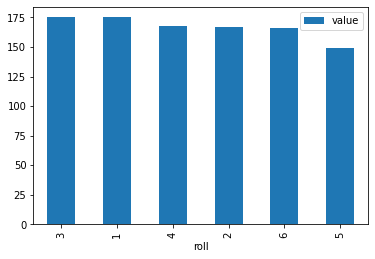

In [151]:
# your code here
fd=data_renamed["value"].value_counts().reset_index() 
fd_renamed= fd.rename(columns={'index':'roll'})
display(fd_renamed)
fd_renamed.plot.bar(x="roll", y="value");

In [ ]:
"""
your comments here
The frequency ditribution is more balanced along every values. As you increase the number of times
you roll the dice, if it is a fair dice, the frequency distribution will show very similar numbers for every value. 
What this is telling us is that the dice is fair. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [163]:
# your code here
data=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/ages_population.csv')
display(data)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


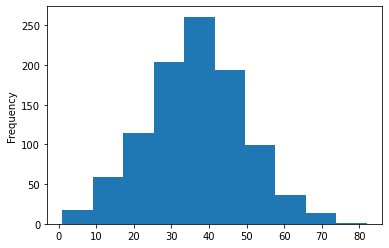

In [164]:
data_renamed=data.sort_values('observation').reset_index()
data_renamed_final=data_renamed['observation'].reset_index()
fd=data_renamed_final["observation"].value_counts().reset_index() 
data['observation'].plot.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [165]:
# your code here
data['observation'].mean()


36.56

In [166]:
data['observation'].std()

12.81649962597677

In [ ]:
"""
your comments here
The mean falled inside the range I guessed by looking at the histogram. I was not able to guess the std
by looking at the histogram.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


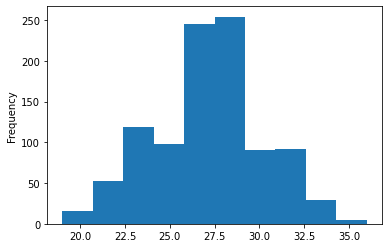

In [167]:
# your code here
data=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/ages_population2.csv')
display(data)
data['observation'].plot.hist();

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [168]:
"""
your comments here
Yes, I see that range of values is shorter (20-35) versus (0-80) and values are more concentrated in the center.

"""

'\nyour comments here\nYes, I see that range of values is shorter (20-35) versus (0-80) and values are more concentrated in the center.\n\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [169]:
# your code here
data['observation'].mean()


27.155

In [170]:
data['observation'].std()

2.9698139326891835

In [ ]:
"""
your comments here
It makes sense to me that mean is lower, since the range ov values is lower and very concentrated 
in the central values. The fact of htis distribution having a lower std also fits with the visual
intuition of a more "concentrated" distribution. 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


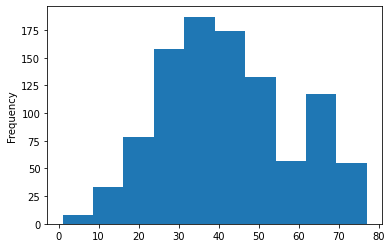

In [171]:
# your code here
data=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/ages_population3.csv')
display(data)
data['observation'].plot.hist();

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [172]:
# your code here
data['observation'].mean()

41.989

In [173]:
data['observation'].std()

16.14470595986593

In [ ]:
"""
your comments here
We can see that it has a higher mean, because there are more values at the left (where the 
ages are higher) and that it has also a higher std, since the values are also more disperse
along the range of values of the population
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [184]:
# your code here
# I reload the data with different names to allow comparisons
data1=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/ages_population.csv')
data3=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/ages_population3.csv')

In [194]:
data1_sorted=data1.sort_values(by=["observation"])
data3_sorted=data3.sort_values(by=["observation"])

In [192]:
# I use the function I defined to obtain the quartiles of the first population
quartile_calculation(data1_sorted,0)

'first quartile: [1.0 , 25.0)      second quartile: [25.0 , 37.0)      third quartile: [37.0 , 42.0)      fourth quartile: [42.0 , 82.0]'

In [195]:
# I use the function I defined to obtain the quartiles of the first population
quartile_calculation(data3_sorted,0)

'first quartile: [1.0 , 32.0)      second quartile: [32.0 , 40.0)      third quartile: [40.0 , 43.0)      fourth quartile: [43.0 , 77.0]'

In [ ]:
"""
your comments here
We can see that in the case of first population, the mean is in the middle of the second quartile,
while in the third population the mean is inside the third quartile. This shows that the distribution is weighted
to the right, and fits with the fact of the mean being more far from the median in the case of the third 
distribution

"""

In [201]:
data1['observation'].mean()

36.56

In [202]:
data1['observation'].median()

37.0

In [203]:
data3['observation'].mean()

41.989

In [204]:
data3['observation'].median()

40.0

<AxesSubplot:ylabel='Frequency'>

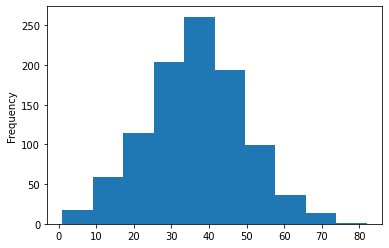

In [185]:
data1['observation'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

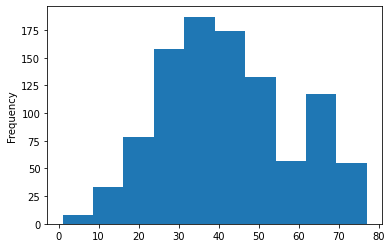

In [186]:
data3['observation'].plot.hist()

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [211]:
# your code here
data1['observation'].quantile(0.80)

47.0

In [212]:
data3['observation'].quantile(0.80)

57.0

In [213]:
data1['observation'].quantile(0.20)

26.0

In [214]:
data3['observation'].quantile(0.20)

28.0

In [ ]:
"""
your comments here
Perhaps looking at extreme percentiles (30% and 80%) can give us an idea of how how skwewed the third 
distribution is to the right.
In both cases the median is around 40 but in the case of the thrid distribution the boundaries of the
80% percentile-segment (60% to 100%) are 10 points far to the right. 
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""